Read the Dataset Using Pandas

In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv('student_data.csv')
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


Firstly Find the Grade Mean Among All

In [13]:
data['grade_mean'] = data[['G1', 'G2', 'G3']].mean(axis=1)
print(data[['G1', 'G2', 'G3', 'grade_mean']].head())

   G1  G2  G3  grade_mean
0   5   6   6    5.666667
1   5   5   6    5.333333
2   7   8  10    8.333333
3  15  14  15   14.666667
4   6  10  10    8.666667


In [14]:
numeric_data = data.select_dtypes(include=['number'])
correlations = numeric_data.corr()['grade_mean'].sort_values(ascending=False)

top4_features = correlations.index[1:5]
print("\nTop 4 features correlated with Grade Mean:")
print(top4_features)


Top 4 features correlated with Grade Mean:
Index(['G2', 'G3', 'G1', 'Medu'], dtype='object')


Comparison Of Better Grades

In [15]:
gender_comparison = data.groupby('sex')['grade_mean'].mean()
print("\nAverage Grades by Gender:")
print(gender_comparison)

age_comparison = data.groupby('age')['grade_mean'].mean()
print("\nAverage Grades by Age:")
print(age_comparison)



Average Grades by Gender:
sex
F    10.325321
M    11.073084
Name: grade_mean, dtype: float64

Average Grades by Age:
age
15    11.284553
16    11.051282
17    10.551020
18    10.134146
19     9.236111
20    13.777778
21     8.333333
22     7.333333
Name: grade_mean, dtype: float64


Count of Distinct Values in Each Column and Dropping Columns

In [16]:
distinct_counts = data.nunique()
print("\nDistinct Values in Each Column:")
print(distinct_counts)

high_card_cols = distinct_counts[distinct_counts > 0.8 * len(data)].index.tolist()
print("\nColumns to be Dropped due to High Distinct Values:")
print(high_card_cols)

data = data.drop(columns=high_card_cols)



Distinct Values in Each Column:
school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
grade_mean    54
dtype: int64

Columns to be Dropped due to High Distinct Values:
[]


Replacing Missing Values By Filling Them

In [17]:
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column] = data.groupby('grade_mean')[column].transform(lambda x: x.fillna(x.mode()[0]))

print("\nMissing values after filling:")
print(data.isnull().sum())


Missing values after filling:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
grade_mean    0
dtype: int64


Label Encoding All the other Columns present

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("\nData after Label Encoding:")
print(data.head())



Data after Label Encoding:
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  grade_mean  
0         3      4     1     1       3         6   5   6   6    5.666667  
1         3      3     1     1       3         4   5   5   6    5.333333  
2         3      2     2     3       3        10   7   8  10    8.333333  
3         2      2     1     1       5         2  15  14  15   14.666667  
4         3      2     1     2       5         4   6  10  10    8.666667  

[5 rows x 34 columns]


Applying Apriori Algorithm for Association Rules

In [44]:
import pandas as pd
import numpy as np
from pyECLAT import ECLAT
data = pd.read_csv('student_data.csv')
data_eclat = data.copy()
for col in data_eclat.columns:
    if np.issubdtype(data_eclat[col].dtype, np.number):
        data_eclat[col] = pd.cut(data_eclat[col], bins=3, labels=[f"{col}_Low", f"{col}_Medium", f"{col}_High"])
transactions = data_eclat.apply(lambda row: list(row.values), axis=1).tolist()
transactions_df = pd.DataFrame(transactions)
eclat_instance = ECLAT(data=transactions_df, verbose=True)

_, frequent_itemsets = eclat_instance.fit(min_support=0.2, min_combination=2, max_combination=2)

print("Frequent Itemsets Structure:", frequent_itemsets)

if isinstance(frequent_itemsets, pd.DataFrame):
    print("Frequent Itemsets Columns:", frequent_itemsets.columns)

elif isinstance(frequent_itemsets, list):
    print("Frequent Itemsets List Length:", len(frequent_itemsets))
    print("Sample Itemset:", frequent_itemsets[0])

filtered_rules = []

if isinstance(frequent_itemsets, pd.DataFrame):
    for items, support in zip(frequent_itemsets['combination'], frequent_itemsets['support']):
        grade_related = [item for item in items if 'grade_mean_' in item]
        if grade_related:
            antecedent = [item for item in items if item not in grade_related]
            if antecedent:
                filtered_rules.append((antecedent, grade_related, support))
elif isinstance(frequent_itemsets, list):

    for itemset in frequent_itemsets:
        if isinstance(itemset, (list, tuple)):
            items = itemset
            support = 1.0
            grade_related = [item for item in items if 'grade_mean_' in item]
            if grade_related:
                antecedent = [item for item in items if item not in grade_related]
                if antecedent:
                    filtered_rules.append((antecedent, grade_related, support))

filtered_rules_sorted = sorted(filtered_rules, key=lambda x: -x[2])

print("\n Top 10 Most Significant Rules for Grade Mean \n")
if filtered_rules_sorted:
    for i, rule in enumerate(filtered_rules_sorted[:10]):
        antecedent, consequent, support = rule
        print(f"Rule {i+1}: {antecedent} => {consequent} (Support={round(support, 3)})")
else:
    print("No rules found.")


100%|██████████| 70/70 [00:00<00:00, 1640.38it/s]


Combination 2 by 2


1176it [00:26, 45.15it/s]

Frequent Itemsets Structure: {'failures_Low & M': 0.43291139240506327, 'failures_Low & health_High': 0.4911392405063291, 'failures_Low & U': 0.7189873417721518, 'failures_Low & Fedu_Medium': 0.26582278481012656, 'failures_Low & Medu_High': 0.5443037974683544, 'failures_Low & goout_High': 0.30886075949367087, 'failures_Low & health_Low': 0.22025316455696203, 'failures_Low & goout_Medium': 0.31645569620253167, 'failures_Low & Walc_Low': 0.5594936708860759, 'failures_Low & G3_Medium': 0.5443037974683544, 'failures_Low & absences_Low': 0.8962025316455696, 'failures_Low & traveltime_Low': 0.850632911392405, 'failures_Low & Medu_Medium': 0.24050632911392406, 'failures_Low & freetime_Medium': 0.3670886075949367, 'failures_Low & Dalc_Low': 0.8177215189873418, 'failures_Low & G1_High': 0.23544303797468355, 'failures_Low & age_Medium': 0.24556962025316456, 'failures_Low & goout_Low': 0.2911392405063291, 'failures_Low & yes': 0.9164556962025316, 'failures_Low & famrel_High': 0.7088607594936709, '

Graph of Mean vs top 4 correlated attributes in Single Plot

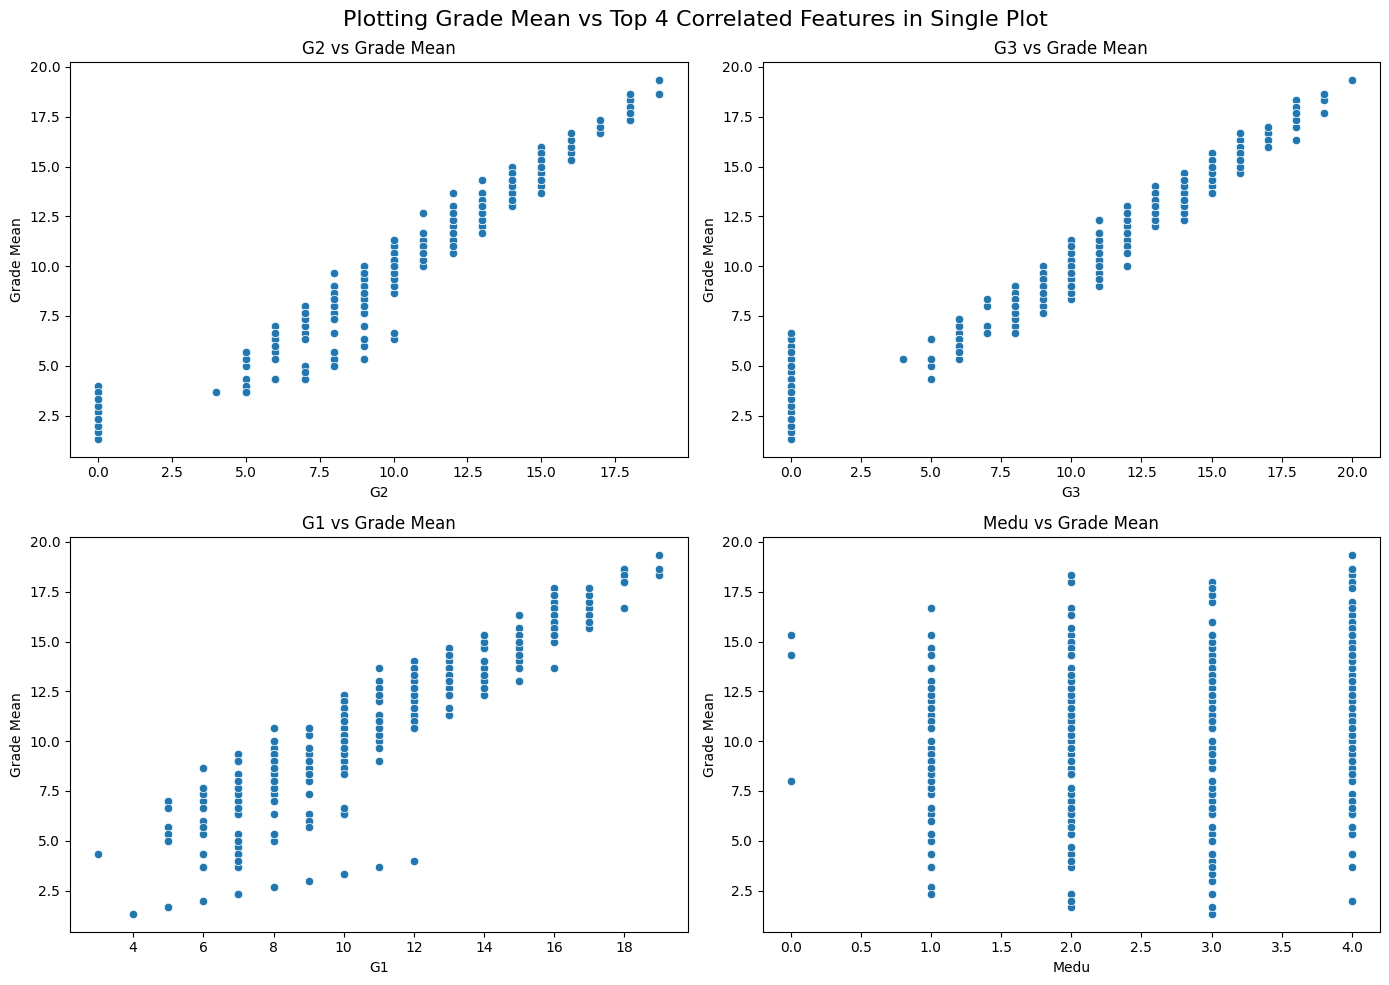

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Plotting Grade Mean vs Top 4 Correlated Features in Single Plot', fontsize=16)

for idx, feature in enumerate(top4_features):
    ax = axs[idx//2, idx%2]
    sns.scatterplot(x=data[feature], y=data['grade_mean'], ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Grade Mean')
    ax.set_title(f'{feature} vs Grade Mean')

plt.tight_layout()
plt.show()
